<a href="https://colab.research.google.com/github/federicochiarello/Hands-On-ML-Notebooks/blob/master/10_Neural_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import sys
import os
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

# Fashion MNIST Classifier

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Split full training set into validation set and training set.  
Scaling pixels intensities to 0-1 range and convert them to floats.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] /255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

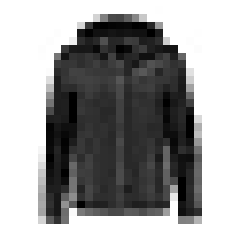

In [ ]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

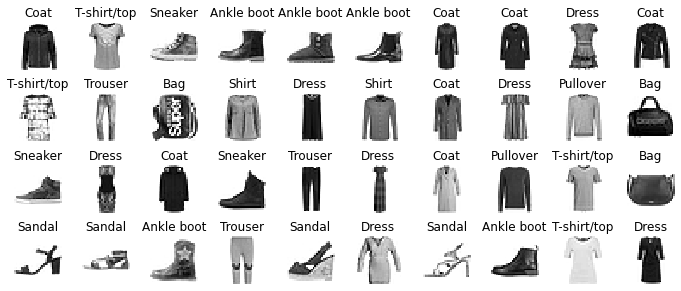

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
from keras.models import Sequential 
from keras.layers import Flatten, Dense

In [ ]:
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')    
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


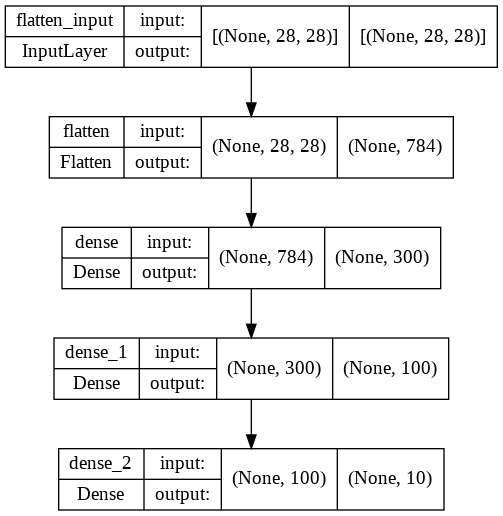

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7180 - accuracy: 0.7658 - val_loss: 0.5226 - val_accuracy: 0.8198
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4881 - accuracy: 0.8293 - val_loss: 0.4434 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4448 - accuracy: 0.8450 - val_loss: 0.4343 - val_accuracy: 0.8486
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4185 - accuracy: 0.8531 - val_loss: 0.4023 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8595 - val_loss: 0.3989 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3820 - accuracy: 0.8647 - val_loss: 0.3850 - val_accuracy: 0.8616
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3691 - accuracy: 0.8701 - val_loss: 0.3714 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

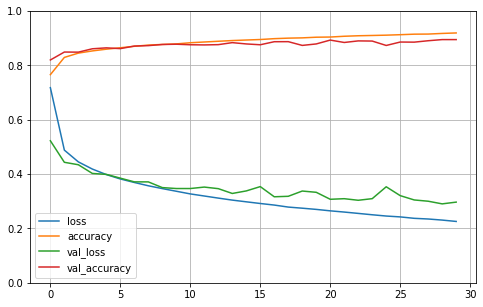

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8806


[0.3350165784358978, 0.8805999755859375]

In [ ]:
np.argmax(model.predict(X_test[:3]), axis=-1)

array([9, 2, 1])

# Regression MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(30, activation='relu', input_dim=X_train.shape[1]),
    Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.9962 - val_loss: 1.7612
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7765 - val_loss: 0.7521
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6926 - val_loss: 0.6813
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6501 - val_loss: 0.6045
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6157 - val_loss: 0.5832
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - val_loss: 0.5568
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5633 - val_loss: 0.5274
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5427 - val_loss: 0.5366
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5248 - val_loss: 0.5171
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5093 - val_loss: 0.4867

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4321


0.4321065843105316

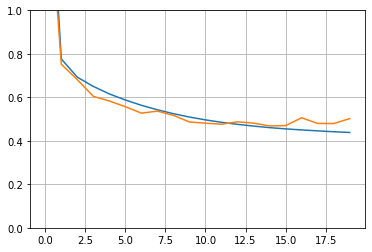

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.predict(X_test[:3])

array([[0.59450144],
       [1.6605946 ],
       [3.2901354 ]], dtype=float32)

# Functional API

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation='relu')(input_)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_11[0][0]']         

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9918 - val_loss: 1.3463
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7467 - val_loss: 0.7129
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6701 - val_loss: 0.6198
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6254 - val_loss: 0.5974
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5499
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5637 - val_loss: 0.5205
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5401 - val_loss: 0.5025
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5200 - val_loss: 0.4871
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5041 - val_loss: 0.4717
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4886 - val_loss: 0.4578

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.4139


0.41392865777015686

## Two inputs

In [ ]:
input_A = Input(shape=[5], name='wide_input')
input_B = Input(shape=[6], name='deep_input')
hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = Dense(1, name='output')(concat)

model = Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

history = model.fit({'wide_input': X_train_A, 'deep_input': X_train_B}, y_train, epochs=20,
                    validation_data=({'wide_input': X_valid_A, 'deep_input': X_valid_B}, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3931 - val_loss: 0.3671
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3927 - val_loss: 0.3635
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3914 - val_loss: 0.3656
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3911 - val_loss: 0.3625
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3903 - val_loss: 0.3619
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3896 - val_loss: 0.3792
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3889 - val_loss: 0.3646
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3883 - val_loss: 0.3708
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3874 - val_loss: 0.3614
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3867 - val_loss: 0.3609

In [ ]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3799


0.3798938989639282

## Auxiliary Output

In [ ]:
input_A = Input(shape=[5], name='wide_input')
input_B = Input(shape=[6], name='deep_input')
hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = Dense(1, name='main_output')(concat)
aux_output = Dense(1, name='aux_output')(hidden2)

model = Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=['mse','mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
history = model.fit({'wide_input': X_train_A, 'deep_input': X_train_B}, 
                    {'main_output': y_train, 'aux_output': y_train}, epochs=20,
                    validation_data=({'wide_input': X_valid_A, 'deep_input': X_valid_B}, 
                                     {'main_output': y_valid, 'aux_output': y_valid}))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8559 - main_output_loss: 0.7301 - aux_output_loss: 1.9879 - val_loss: 0.9285 - val_main_output_loss: 0.6407 - val_aux_output_loss: 3.5186
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7176 - main_output_loss: 0.6166 - aux_output_loss: 1.6268 - val_loss: 0.8391 - val_main_output_loss: 0.5631 - val_aux_output_loss: 3.3234
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6486 - main_output_loss: 0.5589 - aux_output_loss: 1.4555 - val_loss: 0.7741 - val_main_output_loss: 0.5392 - val_aux_output_loss: 2.8881
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6055 - main_output_loss: 0.5221 - aux_output_loss: 1.3559 - val_loss: 0.6978 - val_main_output_loss: 0.4944 - val_aux_output_loss: 2.5286
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5744 - main_output_loss: 0.4951 - aux_output_loss: 1.2878 - val_loss

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 3ms/step - loss: 0.4581 - main_output_loss: 0.4122 - aux_output_loss: 0.8705


# Subclassing API

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(35, activation='relu')

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

363/363 [==============================] - 1s 2ms/step - loss: 0.6477 - output_1_loss: 0.5598 - output_2_loss: 1.4390 - val_loss: 0.6962 - val_output_1_loss: 0.5374 - val_output_2_loss: 2.1257
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6178 - output_1_loss: 0.5361 - output_2_loss: 1.3535 - val_loss: 0.6677 - val_output_1_loss: 0.5204 - val_output_2_loss: 1.9939
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5945 - output_1_loss: 0.5168 - output_2_loss: 1.2936 - val_loss: 0.6260 - val_output_1_loss: 0.4823 - val_output_2_loss: 1.9201
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5764 - output_1_loss: 0.5016 - output_2_loss: 1.2491 - val_loss: 0.5962 - val_output_1_loss: 0.4668 - val_output_2_loss: 1.7605
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5603 - output_1_loss: 0.4879 - output_2_loss: 1.2124 - val_loss: 0.5720 - val_output_1_loss: 0.4518 - val_output_2_loss

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.5326 - output_1_loss: 0.4644 - output_2_loss: 1.1460


# Save and Restore Models

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])  

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7666 - val_loss: 1.9511
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6642 - val_loss: 0.6717
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5959 - val_loss: 0.5530
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5546 - val_loss: 0.5179
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5202 - val_loss: 0.5510
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4942 - val_loss: 0.5019
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4726 - val_loss: 0.4427
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4554 - val_loss: 0.4350
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4426 - val_loss: 0.4110
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4226


In [ ]:
model.save('my_keras_model.h5')

In [ ]:
restored_model = keras.models.load_model('my_keras_model.h5')

In [ ]:
restored_model.predict(X_test[:3])

array([[0.7558957],
       [1.5451434],
       [3.3993552]], dtype=float32)

In [ ]:
restored_model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4246 - val_loss: 0.3951
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4181 - val_loss: 0.3925


# Callbacks

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('my_keras_model.h5', save_best_only=True)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4881 - val_loss: 0.5160
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4727 - val_loss: 0.5068
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4603 - val_loss: 0.4629
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4503 - val_loss: 0.4378
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4417 - val_loss: 0.4301
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4347 - val_loss: 0.4084
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4286 - val_loss: 0.4010
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4233 - val_loss: 0.3958
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4191 - val_loss: 0.3922
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4151 - val_lo

In [ ]:
model = keras.models.load_model('my_keras_model.h5')
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3704


In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/3
355/363 [============================>.] - ETA: 0s - loss: 0.3583
val/train: 0.98
363/363 [==============================] - 1s 4ms/step - loss: 0.3585 - val_loss: 0.3505
Epoch 2/3
340/363 [===========================>..] - ETA: 0s - loss: 0.3597
val/train: 1.02
363/363 [==============================] - 1s 2ms/step - loss: 0.3573 - val_loss: 0.3658
Epoch 3/3
344/363 [===========================>..] - ETA: 0s - loss: 0.3539
val/train: 1.07
363/363 [==============================] - 1s 2ms/step - loss: 0.3562 - val_loss: 0.3812


# Fine-Tuning

With [SciKeras](https://www.adriangb.com/scikeras/stable/index.html)


Alternative: [Keras-Tuner](https://keras.io/guides/keras_tuner/getting_started/)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    # optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    # model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

keras_reg = KerasRegressor(build_model,
                           loss='mse',
                           n_hidden=1,
                           n_neurons=30, 
                           learning_rate=3e-3)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=10,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.3161 - val_loss: 1.5904
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4812 - val_loss: 2.4016
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4354 - val_loss: 2.6274
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4145 - val_loss: 2.8750
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4073 - val_loss: 1.8590
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3930 - val_loss: 2.7943
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3897 - val_loss: 2.6498
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3802 - val_loss: 2.6181
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3757 - val_loss: 2.8521
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3691 - val_loss: 2.9478

KerasRegressor(
	model=<function build_model at 0x7fb7e61723b0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=mse
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=1
	n_neurons=30
	learning_rate=0.003
)

In [ ]:
mse_test = keras_reg.score(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step
0.7255334379716976


In [ ]:
keras_reg.predict(X_test[:3])

1/1 [==============================] - 0s 15ms/step


array([0.7355392, 1.824644 , 4.048487 ], dtype=float32)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "optimizer__learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

rnd_search_cv.fit(X_train, y_train, epochs=40,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/40
242/242 [==============================] - 1s 2ms/step - loss: 0.6452 - val_loss: 1.2954
Epoch 2/40
242/242 [==============================] - 0s 2ms/step - loss: 0.4101 - val_loss: 2.3827
Epoch 3/40
242/242 [==============================] - 0s 2ms/step - loss: 0.4202 - val_loss: 1.9037
Epoch 4/40
242/242 [==============================] - 0s 2ms/step - loss: 0.3976 - val_loss: 1.0744
Epoch 5/40
242/242 [==============================] - 0s 2ms/step - loss: 0.3836 - val_loss: 0.9161
Epoch 6/40
242/242 [==============================] - 0s 2ms/step - loss: 0.3968 - val_loss: 1.5863
Epoch 7/40
242/242 [==============================] - 1s 2ms/step - loss: 0.3479 - val_loss: 2.6327
Epoch 8/40
242/242 [==============================] - 0s 2ms/step - loss: 0.3496 - val_loss: 1.7654
Epoch 9/40
242/242 [==============================] - 0s 2ms/step - loss: 0.3588 - val_loss: 0.4097
Epoch 10/40
242/242 [==================

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(learning_rate=0.003, loss='mse', model=<function build_model at 0x7fb7e61723b0>, n_hidden=1, n_neurons=30),
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'optimizer__learning_rate': [0.01040312247990068,
                                                                     0.0054635060...
                                                                     0.003208077382482118,
                                                                     0.007853256618013817,
             

In [ ]:
rnd_search_cv.best_params_

{'n_hidden': 3,
 'n_neurons': 63,
 'optimizer__learning_rate': 0.008225458982792968}

In [ ]:
rnd_search_cv.best_score_

0.7675421028582884

In [ ]:
rnd_search_cv.best_estimator_

KerasRegressor(
	model=<function build_model at 0x7fb7e61723b0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=mse
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=3
	n_neurons=63
	learning_rate=0.003
	optimizer__learning_rate=0.008225458982792968
)

In [ ]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step


0.78284281584232